In [24]:
# Import (load) the python packages that are required for this analysis. You may need to download them #
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xbpch
import iris
import iris.plot as iplt

#from gamap_colormap import WhGrYlRd
import sys
from matplotlib.colors import LogNorm
import matplotlib

#import rasterio as rio
import os
# import earthpy as et

# import xesmf as xe
from matplotlib.colors import BoundaryNorm
import numpy.ma as ma
from matplotlib.patches import Polygon
import cartopy
import cartopy.feature as cfeature

In [25]:
# warning suppression - deprecation warnings only

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

# Import PAH concentrations

In this script, I will load in the global and Arctic council state data on the basis of slow ozonolysis (base - slow reaction kinetics) and visualize the global "control" data on BAP.

In [27]:
# Load the data and print an example. (here, BAP)
# print data information to screen so user can see structure and numerical ranges

PAH_Species = ['NAP', 'NAP', 'ACY', 'ACE', 'FLO', 'PHE', 'ANT', 'FLA', 'PYR', 'BAA', 'BBF', 'BKF', 'BAP', 'ICDP', 'DAHA', 'BHP', 'NPYR', 'DNPYR']
PAH_Concentrations = []

PAH_files = ['201215_A/',
             '201215_B/',
             '201215_C/',
             '201215_J/',
             '201215_K/',
             '201215_L/',
             '201215_N/']
PAH_totals = []


for y in range(0, len(PAH_files)):
    PAH_Concentrations = []
    for x in range(0, len(PAH_Species)):
        conc = iris.load('/net/fs11/d0/jamiekel/mod_analysis/rundir_' 
                         + PAH_files[y] 
                         + PAH_Species[x] 
                         + '.nc')[0]
        print(conc)
        PAH_Concentrations.append(conc[0])
        # print(PAH_Concentrations)
    PAH_totals.append(PAH_Concentrations)

unknown / (1)                       (lev: 47; latitude: 91; longitude: 144)
     Dimension coordinates:
          lev                           x             -              -
          latitude                      -             x              -
          longitude                     -             -              x
     Scalar coordinates:
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (lev: 47; latitude: 91; longitude: 144)
     Dimension coordinates:
          lev                           x             -              -
          latitude                      -             x              -
          longitude                     -             -              x
     Scalar coordinates:
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
unknown / (1)                       (lev: 47; lati

In [29]:
BAP = PAH_totals[2][12]
# print (BAP)
print ('')
print ('printing what this "looks" like to the user...')
print (BAP)
print ('')
print ('printing range (minimum/maximum) values to show user....')
print ('min concentration BAP = ', np.min(BAP.data))
print ('max concentration BAP = ',  np.max(BAP.data))


printing what this "looks" like to the user...
unknown / (1)                       (latitude: 91; longitude: 144)
     Dimension coordinates:
          latitude                           x              -
          longitude                          -              x
     Scalar coordinates:
          lev: 0
          time: 2014-03-17 00:00:00, bound=(2014-01-01 00:00:00, 2014-06-01 00:00:00)
     Attributes:
          Conventions: CF-1.5

printing range (minimum/maximum) values to show user....
min concentration BAP =  0.0
max concentration BAP =  17.337639


In [74]:
# define a plotting function for BAP

# pass the list of all regional concentrations from above
# pass the string for the region you want

def BAP_plotter(totals):
    for i in range(0, len(totals)):
        BAP = totals[i][12]

        # Manually define countour levels 
        contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

        # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
        cmap = plt.cm.get_cmap('YlOrRd')

        # combine the countour levels and colour scale 
        norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

        # create blank figure with manually-defined size (inches)
        plt.figure(figsize=(10, 7))                                                      

        # define how many sub-plots will be in this, and the geospatial projection
        ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
        
        plot_title = 'Simulated (GEOS-Chem) annual-average BAP concentration'

        # plot a title 
        plt.title(plot_title, fontsize=12)

        # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
        mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

        # plot a colour bar 
        bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
        bar.set_ticks(contour_levels[1:-1])
        bar.set_ticklabels(contour_levels[1:-1])
        bar.ax.tick_params(labelsize=12, rotation=60)
        bar.set_label('ng m$^{-3}$', fontsize=12)
        plt.gca().autoscale(False)

        # overlay coastlines on the map 
        plt.gca().coastlines()

        # make figure look prettier by trying to expand the images to cover white space
        plt.tight_layout()
        
        # source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
#         for zone in range(0, len(source_zones)):
#             if str(totals[i]) == source_zones[zone]:
#                 title = 'Spatial_Conc_' + source_zones[zone] + 'Fast_Rxn' + '.png'
                
#                 # save the figure 
#                 plt.savefig(title, dpi=300)

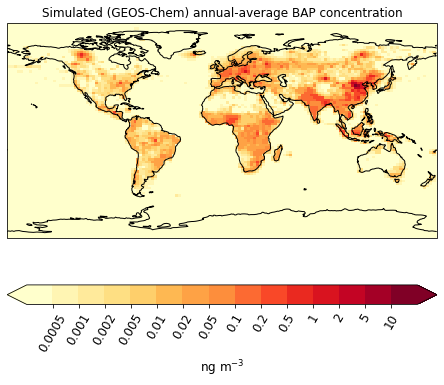

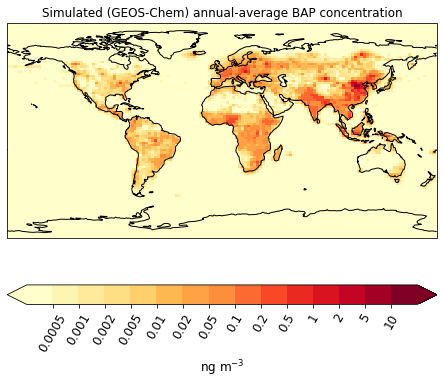

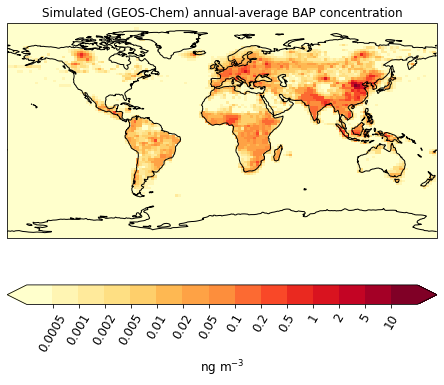

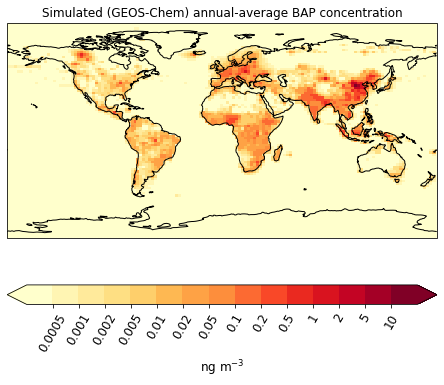

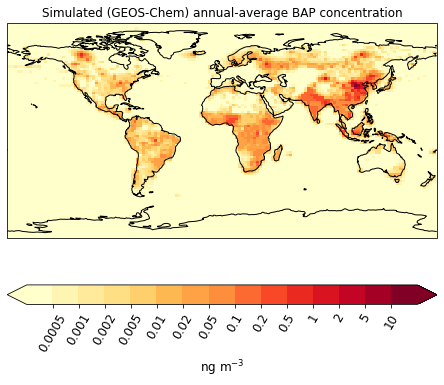

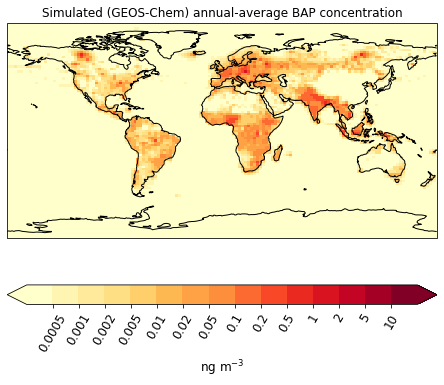

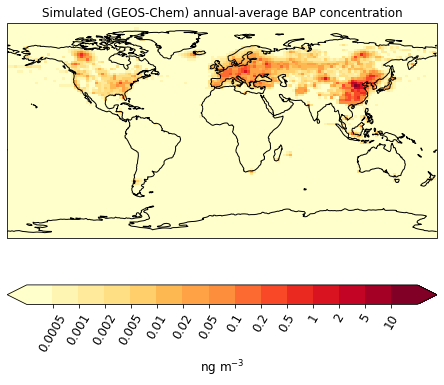

In [75]:
BAP_plotter(PAH_totals)

In [20]:
# pass the list of all regional concentrations from above
# pass the string for the regions you want to subtract

def BAP_subtractor(totals, zone_1, zone_2):
    source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
    index1 = 0
    index2 = 0
    for zone in range(0, len(source_zones)):
        if zone_1 == source_zones[zone]:
            index1 = source_zones.index(source_zones[zone])
        if zone_2 == source_zones[zone]:
            index2 = source_zones.index(source_zones[zone])
        
    BAP = totals[index1][12] - totals[index2][12]

    # Manually define countour levels 
    contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
    cmap = plt.cm.get_cmap('YlOrRd')

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=(10, 7))                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())
    
    plot_title = 'Simulated (GEOS-Chem) annual-average BAP concentration in ' + zone_2

    # plot a title 
    plt.title(plot_title, fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_levels[1:-1])
    bar.set_ticklabels(contour_levels[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    title = 'Spatial_Conc_' + zone_1 + '_' + zone_2 + 'Fast_Rxns' + '.png'

    # save the figure 
    plt.savefig(title, dpi=300)

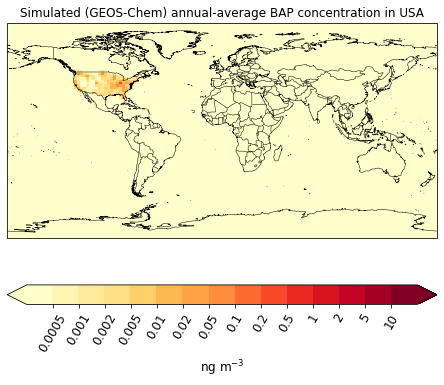

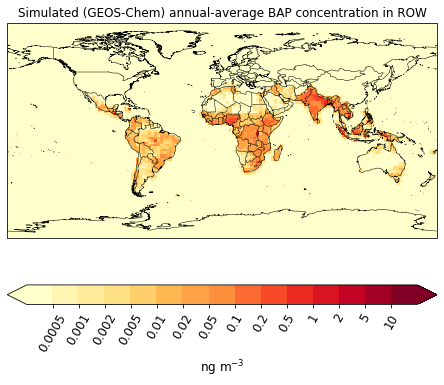

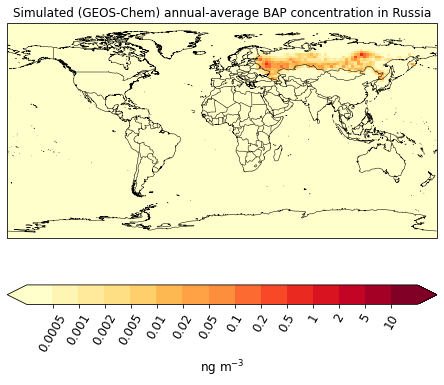

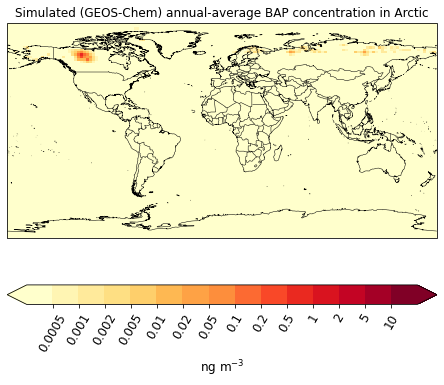

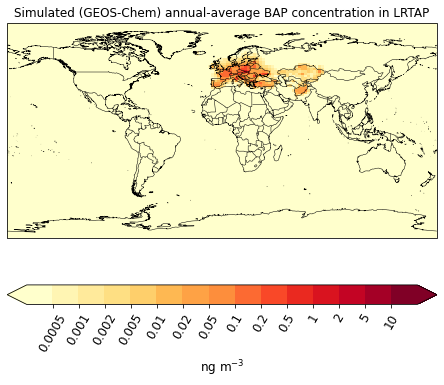

In [76]:
# just calculate concentration differences between global and US sourced pollution here
# can test it with any difference
BAP_subtractor(PAH_totals, 'Global', 'USA')
BAP_subtractor(PAH_totals,  'Global', 'ROW')
BAP_subtractor(PAH_totals,  'Global', 'Russia')
BAP_subtractor(PAH_totals,  'Global', 'Arctic')
BAP_subtractor(PAH_totals,  'Global', 'LRTAP')

In [77]:
# load in population, mask, mortality files

pop_dens_path = 'PKU_PAH_emissions/HTAP/gpw_v4_population_density_rev11_2015_1_deg_2_25.nc'
mask_path = 'PKU_PAH_emissions/HTAP/region_mask_Arctic_ext.nc'
SA_path = 'mod_analysis/rundir_201215_A/Surface_Area_GridCells.nc'

mask = iris.load('/net/fs11/d0/jamiekel/' + mask_path)[0]
SA = iris.load('/net/fs11/d0/jamiekel/' + SA_path)[0]
pop_dens = iris.load('/net/fs11/d0/jamiekel/' + pop_dens_path)[0]
#print(pop_dens)

In [21]:
# pass the list of all regional concentrations from above
# pass the string for the regions you want to calculate cancer for

def BAP_cancer_calc(totals, zone_1, zone_2):
    source_zones = ['Global', 'Arctic', 'USA', 'Russia', 'LRTAP', 'East Asia', 'ROW']
    index1 = 0
    index2 = 0
    for zone in range(0, len(source_zones)):
        if zone_1 == source_zones[zone]:
            index1 = source_zones.index(source_zones[zone])
        if zone_2 == source_zones[zone]:
            index2 = source_zones.index(source_zones[zone])
        
    BAP = totals[index1][12] - totals[index2][12]
    
    # conduct the cancer calculation

    # Manually define countour levels 
    contour_levels         = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 30]

    # choose a colour scale that you think looks pretty (see link for more options - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)
    cmap = plt.cm.get_cmap('YlOrRd')

    # combine the countour levels and colour scale 
    norm = BoundaryNorm(contour_levels, ncolors=cmap.N, clip=True)

    # create blank figure with manually-defined size (inches)
    plt.figure(figsize=(10, 7))                                                      

    # define how many sub-plots will be in this, and the geospatial projection
    ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

    # plot a title 
    plt.title('Simulated (GEOS-Chem) annual-average BAP concentration', fontsize=12)

    # plot countour plot (function = pcolormesh) using data (BAP) according to you colour (cmap + norm) 
    mesh = iplt.pcolormesh(BAP, cmap=cmap, norm=norm)

    # plot a colour bar 
    bar = plt.colorbar(mesh, orientation='horizontal', extend='both')
    bar.set_ticks(contour_levels[1:-1])
    bar.set_ticklabels(contour_levels[1:-1])
    bar.ax.tick_params(labelsize=12, rotation=60)
    bar.set_label('ng m$^{-3}$', fontsize=12)
    plt.gca().autoscale(False)

    # overlay coastlines on the map 
    # plt.gca().coastlines()
    plt.gca().coastlines(resolution='50m', linewidth=0.5, color='black')
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black', linewidth=0.5)
    
    # add the mask
    plt.plot(mask)

    # make figure look prettier by trying to expand the images to cover white space
    plt.tight_layout()

    #for zone in range(0, len(source_zones)):
    title = 'Spatial_Conc_' + zone_1 + '_' + zone_2 + '.png'

    # save the figure 
    plt.savefig(title, dpi=300)

In [19]:
#BAP_cancer_calc(PAH_totals, 'Global', 'USA')